<a href="https://colab.research.google.com/github/Dheeraj024/DBSCAN-example/blob/main/DBSCAN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN and how to optimize it using Grid Search


DBSCAN stands for "Density Based Spatial Clustering of Application with Noise".
It is a powerful unsupervised clustering algorithmm used to find clusters in a dataset.




Easy implementation is carried on sklearn's datasets collection called California Housing price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

Convert this sklearn dataset into a Pandas Dataframe

In [15]:
def sklearn_to_df(sklearn_dataset):
  df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
  df['target']=pd.Series(sklearn_dataset.target)
  return df
df = sklearn_to_df(california_housing)

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

Just for visualization point of view, we have taken only 2 features (i.e. Latitude and Longitude)

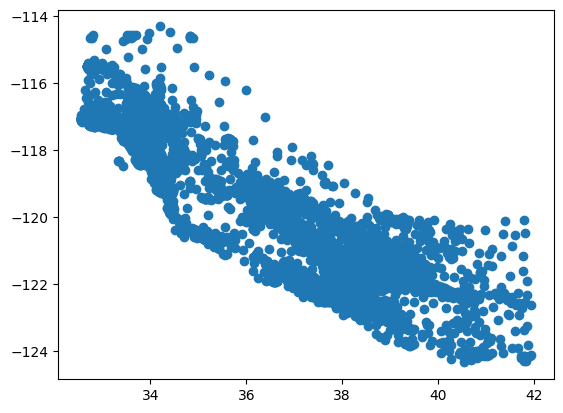

In [17]:
lat, log = df.Latitude,df.Longitude
plt.scatter(lat,log)

In [19]:
latlong = df[['Latitude','Longitude']]

Converting latlong data into numpy array

In [20]:
X = latlong.to_numpy()
X.shape
X

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

Creating a model

In [21]:
from sklearn.cluster import DBSCAN
dbscan_model1 = DBSCAN().fit(X)
dbscan_model1

DBSCAN()

Here the model will return a list containing labels for each set of points and this is used to plot and cluster the points.


In [22]:
dbscan_model1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
df['cluster']=dbscan_model1.labels_

In [24]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


TO find the number of clusters we use the value_counts fuctions


In [26]:
df['cluster'].value_counts()

 0    20634
-1        6
Name: cluster, dtype: int64

Here -1 represent the outliers/points that doesn't belong to any category


To plot this we are using a plotly.express library.

In [27]:
import plotly.express as px
fig = px.scatter(x=lat,y=log,color = df['cluster'])
fig.show()

We can see that the model did not do anything special as it labelled the entire dataset as a single cluster.

SO, it can be fine tuned using hyperparameters.
DBSCAN has 2 hyperparameters:-  

1.   **epsilon(eps)**: It is the length of the radius around any point.
2.   **minpoints(min_points)**: minimum number of dots that should be inside the circle for DBSCAN to consider them a group.Three types of data points are:
*   **Core point**
*   **Border point**
*   **Noise**





Taking random values of eps and min_point

In [33]:
dbscan_model1= DBSCAN(eps=0.2,min_samples=20).fit(X)

In [34]:
df['cluster'] = dbscan_model1.labels_
df['cluster'].value_counts()

 5    11243
 0     8536
-1      529
 2      109
 1       98
 3       98
 4       27
Name: cluster, dtype: int64

In [35]:
fig = px.scatter(x=lat,y=log,color = df['cluster'])
fig.show()

How to know which model is better, so for that we have use **Silhouette Score**

> Silhoutter Score is a way to measure how good the clusters are when you use a clustering algorithm are.
Silhoutter score ranges from -1 to 1.



Evaluation of the model

In [36]:
from sklearn.metrics import silhouette_score as shs
shs(X,df['cluster'])

0.35580754682404403

How can we know which values of epsilon and min_points are best, so for that we will use **GRID SEARCH** technique which is used to find the best combination of hyperparameter for a model.

In [37]:
epsilon = np.linspace(0.01,1,num = 20)
epsilon

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [38]:
min_samples = np.arange(2,25,step = 2)
min_samples

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [39]:
import itertools
combinations = list(itertools.product(epsilon,min_samples))
N = len(combinations)
N

240

In [48]:
def Gridsearch(combinations,X):
  scores = []
  all_label = []

  for i, (eps,num_samples) in enumerate(combinations):
    dbscan_model = DBSCAN(eps = eps, min_samples = num_samples).fit(X)
    labels = dbscan_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -=1
    if (num_clusters <2) or (num_clusters >25):
      scores.append(-20)
      all_label.append('poor')
      print("at iteration :", i, "ep = ", eps, "min_sample=", num_samples, "number of clusters=",num_clusters,"moving on ...")
      continue
    scores.append(shs(X,labels))
    all_label.append(labels)
    print("at iteration :",i,"score=",scores[-1],"number of clusters:",num_clusters)
  best_index= np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_label[best_index]
  best_score = scores[best_index]
  return {"best_epsilon": best_parameters[0],
          "best_min_samples": best_parameters[1],
          "best_labels": best_labels,
          "best_score":best_score}


In [49]:
best_para = Gridsearch(combinations,X)

at iteration : 0 ep =  0.01 min_sample= 2 number of clusters= 2391 moving on ...
at iteration : 1 ep =  0.01 min_sample= 4 number of clusters= 1377 moving on ...
at iteration : 2 ep =  0.01 min_sample= 6 number of clusters= 899 moving on ...
at iteration : 3 ep =  0.01 min_sample= 8 number of clusters= 543 moving on ...
at iteration : 4 ep =  0.01 min_sample= 10 number of clusters= 328 moving on ...
at iteration : 5 ep =  0.01 min_sample= 12 number of clusters= 209 moving on ...
at iteration : 6 ep =  0.01 min_sample= 14 number of clusters= 128 moving on ...
at iteration : 7 ep =  0.01 min_sample= 16 number of clusters= 89 moving on ...
at iteration : 8 ep =  0.01 min_sample= 18 number of clusters= 58 moving on ...
at iteration : 9 ep =  0.01 min_sample= 20 number of clusters= 34 moving on ...
at iteration : 10 score= -0.7525631181444175 number of clusters: 22
at iteration : 11 score= -0.7637569550987903 number of clusters: 14
at iteration : 12 ep =  0.06210526315789474 min_sample= 2 n

In [50]:
print(best_para)

{'best_epsilon': 0.32263157894736844, 'best_min_samples': 18, 'best_labels': array([0, 0, 0, ..., 0, 0, 0]), 'best_score': 0.656976728819925}


This is the best hyperparameters that we have got with labels which can we used to plot and cluster the data.

In [51]:
df["cluster"] = best_para['best_labels']
df['cluster'].value_counts()

 2    11430
 0     8891
-1      182
 1      119
 3       18
Name: cluster, dtype: int64

In [52]:
fig = px.scatter(x=lat,y=log,color = df['cluster'])
fig.show()

# NOTE

DBSCAN fails when used upon higher dimensionality data(i.e. curse of dimensionality), so for that we can use PCA to reduce the component and the use clustering